<a href="https://colab.research.google.com/github/duberii/pid-playground/blob/main/activities/2D_Histograms_in_ROOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2D Histograms in ROOT**
---
Welcome to Particle Identification Playground! This activity is designed to introduce you to the visualization tools used in particle identification.

**Before attempting this notebook, complete the following activities:**
*   Introduction to Vectors
*   Introduction to Special Relativity
*   Introduction to Pandas
*   Introduction to the Standard Model
*   Introduction to ROOT

**After completing this notebook, you will be able to:**
*   Interpret 2D histograms
*   Create, fill, and draw 2D histograms in ROOT
*   Associate mathematical and visual depictions of error and statistical fluctuations in 2D histograms

In [1]:
#@title Run this cell before starting. This may take a few minutes to run.
!pip install -qqq pidp_tools
from pidp_tools import *
install_ROOT()
!wget -q -O GlueX_Particle_Gun_Simplified.hdf5 https://github.com/duberii/pid-playground/raw/main/data/GlueX_Particle_Gun_Simplified.hdf5
import pandas
from ROOT import gROOT, TH1D, TH2D, TCanvas
import pandas as pd
import numpy as np
simulation_dataframe = pd.read_hdf('GlueX_Particle_Gun_Simplified.hdf5')
masses = {'Proton':0.93827,'Neutron':0.93957,'Kaon':0.49367,'Muon':0.10566,'Pion':0.13957,'Electron':0.000511,'Photon':0}
pure_dataframe = pd.DataFrame()
ptypes = []
for ptype in masses.keys():
  for i in range(10000):
    ptypes.append(ptype)
pure_dataframe['Particle'] = ptypes
pxs = [np.random.uniform(0,1) for i in range(70000)]
pys = [np.random.uniform(0,1) for i in range(70000)]
pzs = [np.random.uniform(0,1) for i in range(70000)]
Es = [(masses[pure_dataframe.iloc[i]['Particle']]**2+pxs[i]**2+pys[i]**2+pzs[i]**2)**0.5 for i in range(70000)]
pure_dataframe['E'] = Es
pure_dataframe['px']= pxs
pure_dataframe['py'] = pys
pure_dataframe['pz'] = pzs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.3 MB/s eta 0:00:00
Welcome to JupyROOT 6.30/04


---
##**Reading 2D Histograms**
---
As mentioned in the previous notebook, the goal of particle identification (PID) is to identify what particles are present in our detectors. So far, we have seen how we can use ROOT's TH1D class to create 1D histograms, but the vast majority of PID methods make use of a **2D histogram**. For example, the plot shown below is a 2D histogram in ROOT.

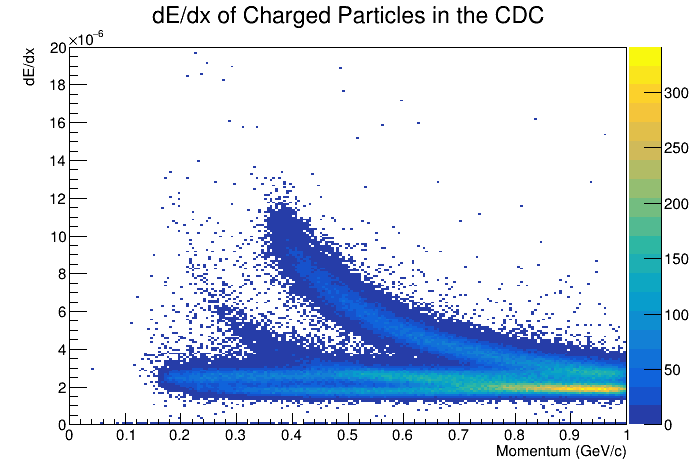

In [2]:
# @title
c1 = TCanvas('c1','c1',700,500)
h1 = TH2D('h1','dE/dx of Charged Particles in the CDC;Momentum (GeV/c);dE/dx',200,0,1,200,0,0.00002)
for row in simulation_dataframe.iloc:
  h1.Fill(row['p'],row['dEdxCDC'])
h1.SetStats(0)
h1.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

At its core, a 2D histogram is extremely similar to a scatter plot. Each data point is plotted by its x value (in this case momentum) and y value (in this case dE/dx). However, instead of recording the location of each point individually, the area of the plot is split into 2D bins (pixels) that record how many points are inside each bin. The number of points in each bin is reflected by its color, and the scale on the right allows you to convert the color back into a number.

---
##**2D Histograms in ROOT**
---
Creating a 2D histogram in ROOT follows exactly the same steps as a 1D histogram with some slight modifications.

---
### **Step 1:** Creating a Canvas
---
The first step for creating any ROOT figure is to create a canvas.

####**Question #1:**
---
Write code in the cell below to create a canvas called "c1", titled "2D histogram", with a width of 700 and a height of 500.

In [ ]:
canvas = #Complete this code

#####**Solution:**

In [3]:
canvas = TCanvas('c1','2D Histogram',700,500)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


---
### **Step 2:** Creating a Histogram
---
When creating a 2D histogram, we use the TH2D constructor instead of the TH1D constructor.
```
my_histogram = TH2D('histogram_name','histogram_title; x axis label; y axis label', num_bins_x, min_value_x, max_value_x, num_bins_y,min_value_y, max_value_y)
```
Note that in contrast to the TH1D constructor, the TH2D constructor requires a range and number of bins for the y axis as well.

####**Question #2:**
---
Write code in the cell below to create a 2D histogram with the following properties:


*   Name: h2
*   Title: Energy vs. Momentum for Stable Particles
*   X axis label: Momentum (GeV/c)
*   Y axis label: Energy (GeV)
*   Number of bins: 200 (both x and y)
*   Minimum values: 0 (both x and y)
*   Maximum values: 2 (both x and y)

In [ ]:
histogram =
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

#####**Solution:**

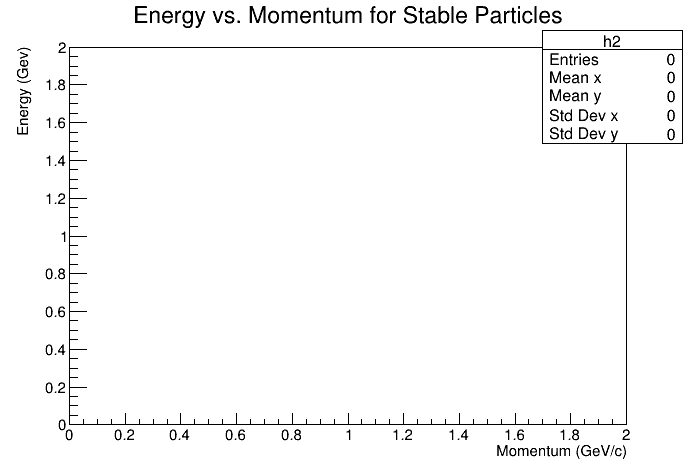

In [4]:
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
### **Step 3:** Filling the Histogram
---
Just like our 1D histogram, we need to fill our 2D histogram using the `Fill` method. However, the `Fill` method of the `TH2D` object takes two inputs, an x value, and a y value. For example,
```
histogram.Fill(20,100)
```
would add a point with an x value of 20 and a y value of 100 to the histogram.

####**Question #3:**
---
In the cell below, write code that creates a new column for the `pure_dataframe` that contains the magnitude of momentum. Then, plot the magnitude of momentum vs. energy for the particles in `pure_dataframe`. Note that the `SetStats` method is used to hide the statistics box.

In [ ]:
pure_dataframe['p'] =
for

histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

#####**Solution:**

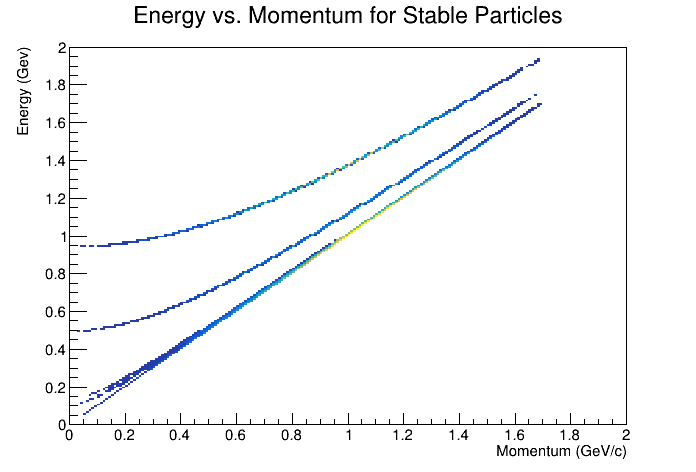

In [5]:
pure_dataframe['p'] = (pure_dataframe['px']**2+pure_dataframe['py']**2+pure_dataframe['pz']**2)**0.5
for row in pure_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])
histogram.SetStats(0)
histogram.Draw()
gROOT.GetListOfCanvases().Draw()

---
##**Putting it All Together**
---
However, this histogram is fairly hard to read. To add color, we need to provide `'COLZ'` as an argument to the `Draw` method. Run the code below to draw the 2D histogram in color.

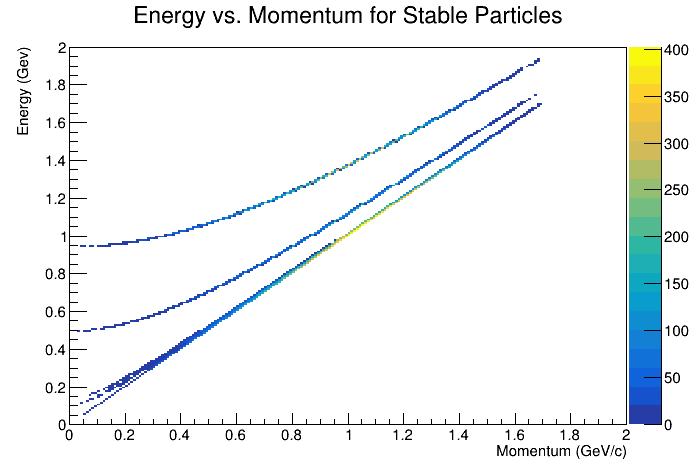

In [6]:
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

All together, your code should look something like:

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


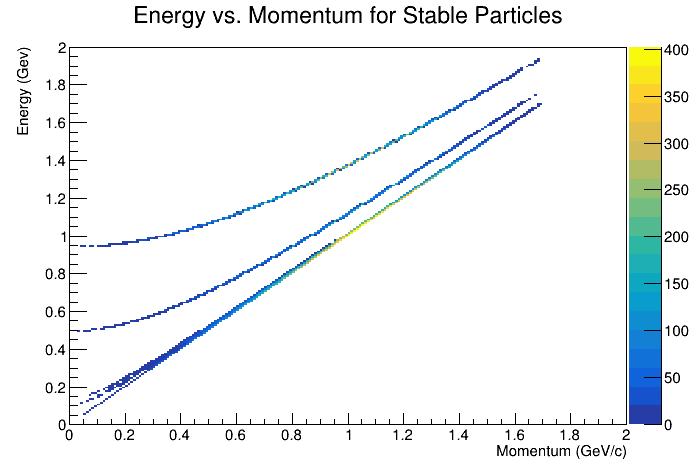

In [7]:
#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)

#Calculating the magnitude of the momentum vector
pure_dataframe['p'] = (pure_dataframe['px']**2+pure_dataframe['py']**2+pure_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in pure_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

####**Question #4:**
---
There are 7 particles that we observe in our detectors. How many particles can you distinguish in the 2D histogram shown above?

Double click to edit this cell and answer the following question: How many particles can you distinguish in the 2D histogram shown above?

#####**Solution:**

With the current ranges, there are about 5 visible stripes on the 2D histogram. However, the lowest 3 stripes merge together around 0.4 GeV/c, which would make it difficult to distinguish these particles.

####**Question #5:**
---
Based on the formula for relativistic energy, should particles with larger mass have larger energies or smaller energies?

Double click to edit this cell and answer the following question: Based on the formula for relativistic energy, should particles with larger mass have larger energies or smaller energies?

#####**Solution:**

The formula for relativistic energy is:
$$
E = \sqrt{(mc^2)^2 + (|p|c)^2}
$$
This formula can be loosely interpreted like a Pythagorean theorem. Imagine a right triangle with side lengths $mc^2$ and $|p|c$. Then the equation above states that the length of the hypotenuse is $E$. If $m=0$, the length of the hypotenuse ($E$) is shorter than if $m>0$. Thus objects with larger masses will have larger energies.

---
## **Errors and Fluctuations**
---

Unfortunately, this data does not resemble real data. All detectors are prone to slight errors in their measurements. In our case, this can affect our measurements of the energy and momentum of these particles, which can affect our calculated invariant mass.

Run the code below to generate a more realistic ("smeared") dataset. Note that to simulate the error of our detector, we are simply adding a randomly generated error to the energies and momenta.

In [8]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['Particle'] = pure_dataframe['Particle']
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

####**Question #6:**
---
Write code in the cell below to create a 2D histogram of the energy vs. magnitude of momentum for particles in the `smeared_dataframe`.

In [ ]:
canvas =

#####**Solution:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


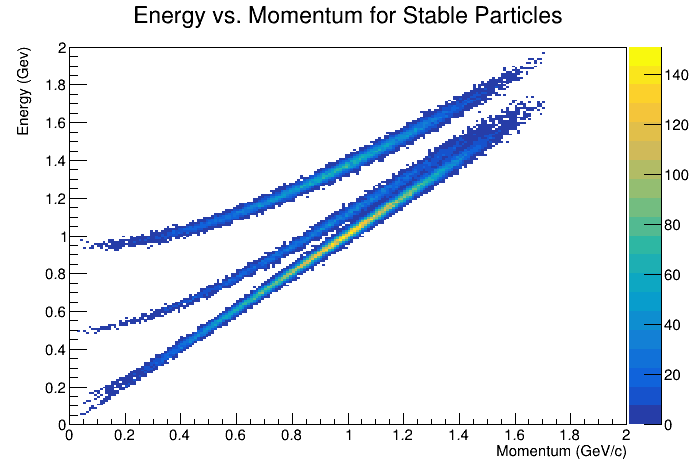

In [9]:
#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)

#Calculating the magnitude of the momentum vector
smeared_dataframe['p'] = (smeared_dataframe['px']**2+smeared_dataframe['py']**2+smeared_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

####**Question #7:**
---
How many particles can you distinguish in the smeared plot?

Double click to edit this cell and answer the following question: How many particles can you distinguish in the smeared plot?

#####**Solution:**

In this plot, only three main stripes can be seen. You may be able to just barely see all five stripes, but realistically, it would be very difficult to distinguish these particles.

---
##**Plotting Realistic Data**
---
Unfortunately, the shortcomings of detectors extend far beyond smearing the data. Run the code below to create a similar plot for a more realistic simulation of the detector measurements.

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


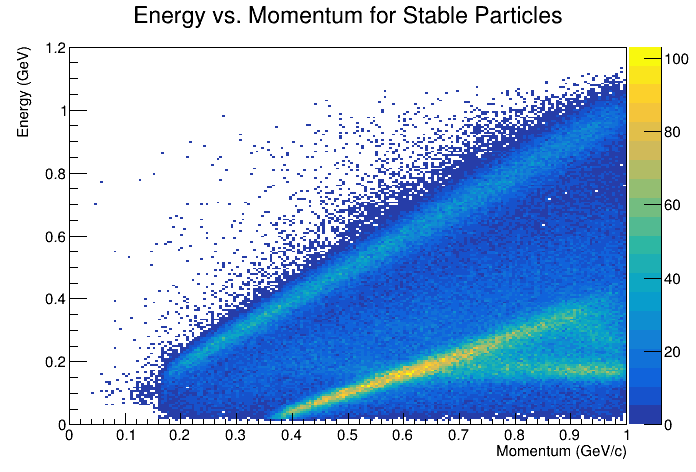

In [10]:
hist2d = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (GeV)', 200, 0, 1, 200,0, 1.2)
for row in simulation_dataframe.iloc:
  hist2d.Fill(row['p'],row['E'])
hist2d.SetStats(0)
hist2d.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

####**Question #8:**
---
If a detector is less precise in its measurements of momentum and energy, how would the histogram of invariant masses change? Modify the code below to test your answer.

In [ ]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['Particle'] = pure_dataframe['Particle']
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)

#Calculating the magnitude of the momentum vector
smeared_dataframe['p'] = (smeared_dataframe['px']**2+smeared_dataframe['py']**2+smeared_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

Double click to edit this cell and answer the following question: If a detector is less precise in its measurements of momentum and energy, how would the histogram of invariant masses change?

#####**Solution:**

Increasing the error (making the measurements of momentum and energy less precise) spreads out the 2D histogram in both directions. In some sense, it makes the histogram more blurred.

**Low error:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


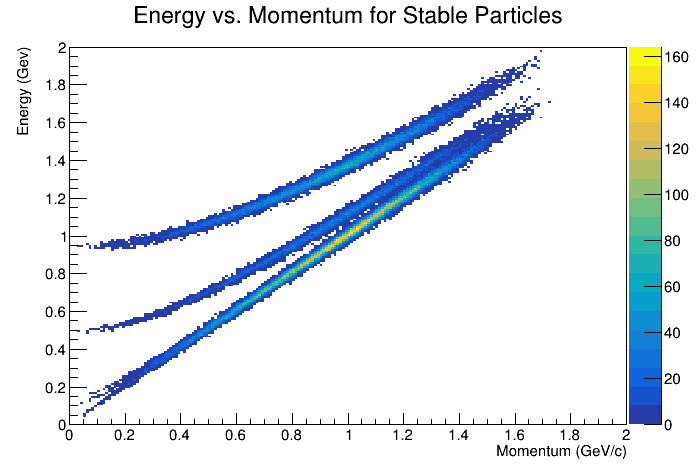

In [11]:
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['Particle'] = pure_dataframe['Particle']
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)

#Calculating the magnitude of the momentum vector
smeared_dataframe['p'] = (smeared_dataframe['px']**2+smeared_dataframe['py']**2+smeared_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

**High error:**

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


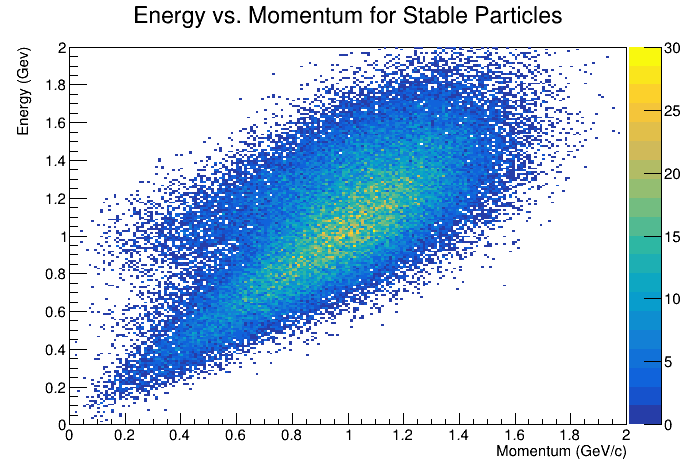

In [12]:
error = 0.1
smeared_dataframe = pd.DataFrame()
smeared_dataframe['Particle'] = pure_dataframe['Particle']
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',200,0,2,200,0,2)

#Calculating the magnitude of the momentum vector
smeared_dataframe['p'] = (smeared_dataframe['px']**2+smeared_dataframe['py']**2+smeared_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

####**Question #9:**
---
Run the code below to plot the energy vs. momentum of protons in the detector. Based on the resulting plots, what can we say about the detector's ability to measure the energy of protons? **Hint:** The simulated data takes into account the properties of the detector, while the smeared data does not.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


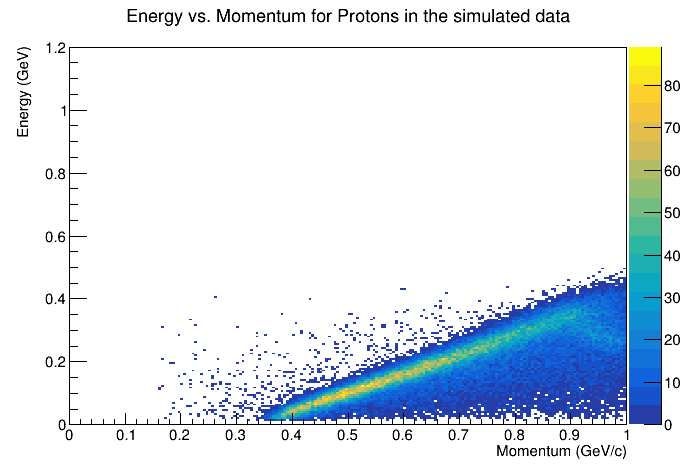

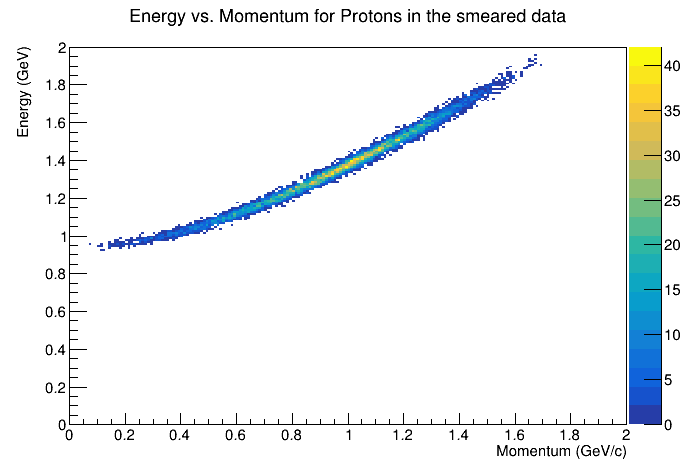

In [13]:
# @title
#Generating smeared data with low error
error = 0.01
smeared_dataframe = pd.DataFrame()
smeared_dataframe['Particle'] = pure_dataframe['Particle']
smeared_dataframe['E'] = [E + np.random.normal(0,error*(E+0.3)) for E in pure_dataframe['E']]
smeared_dataframe['px'] = [px + np.random.normal(0,error*(px+0.3)) for px in pure_dataframe['px']]
smeared_dataframe['py'] = [py + np.random.normal(0,error*(py+0.3)) for py in pure_dataframe['py']]
smeared_dataframe['pz'] = [pz + np.random.normal(0,error*(pz+0.3)) for pz in pure_dataframe['pz']]
smeared_dataframe['m']=(smeared_dataframe['E']**2- smeared_dataframe['px']**2-smeared_dataframe['py']**2-smeared_dataframe['pz']**2)**0.5

#Plotting simulated data
canvas =  TCanvas('c1','Simulated Data',700,500)
hist2d = TH2D('h3','Energy vs. Momentum for Protons in the simulated data; Momentum (GeV/c); Energy (GeV)', 200, 0, 1, 200,0, 1.2)
for row in simulation_dataframe[simulation_dataframe['Particle']=='Proton'].iloc:
  hist2d.Fill(row['p'],row['E'])
hist2d.SetStats(0)
hist2d.Draw('COLZ')

#Plotting smeared data
canvas2 = TCanvas('c2','Smeared Data',700,500)
hist2d_smeared = TH2D('h4','Energy vs. Momentum for Protons in the smeared data; Momentum (GeV/c); Energy (GeV)', 200, 0, 2, 200,0, 2)
for row in smeared_dataframe[smeared_dataframe['Particle']=='Proton'].iloc:
  hist2d_smeared.Fill((row['px']**2+row['py']**2+row['pz']**2)**0.5,row['E'])
hist2d_smeared.SetStats(0)
hist2d_smeared.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

Double click to edit this cell and answer the following question: What can we say about the detector's ability to measure the energy of protons?

#####**Solution:**

Notice how in the simulated data, all of the filled bins are in the lower half of the plot. In contrast, all of the filled bins are in the upper half of the plot in the smeared data. This suggests that even for protons with the same momentum, the energy measured in the simulated data is far lower than the energy predicted by the smeared data. From this, the most likely conclusion is that our detector is not very efficient at measuring the energy of protons. This would only be seen in the simulated data, as the simulated data considers the properties of the detector, while the smeared data does not. In later notebooks, we will see why exactly our detector isn't able to efficiently measure the energy of protons.

####**Question #10:**
---
Increasing the number of bins can increase the resolution of a histogram. Write code in the cell below to draw a histogram of the smeared dataframe with 10,000 bins along each axis. What issue do you notice in this plot? **Hint:** Look at the color scale.

Double click to edit this cell and answer the following question: What issue do you notice in this plot?

#####**Solution:**

When we increase the number of bins too far, there aren't enough data points to fill all the bins, so it is hard to see what the most populated areas of the histogram are.

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


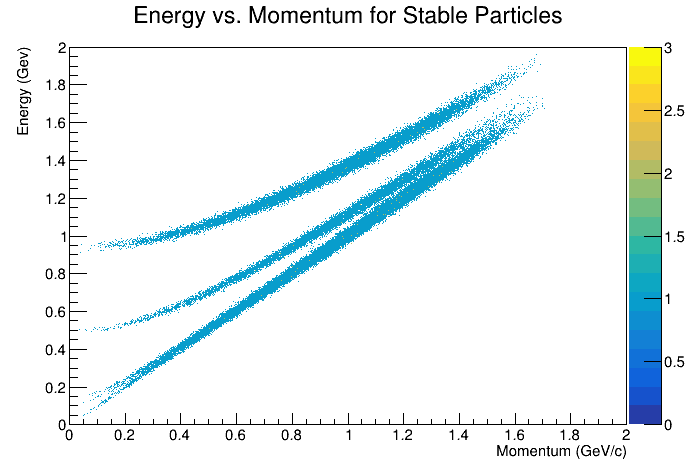

In [14]:
#Deletes other canvases
previous_canvases = gROOT.GetListOfCanvases()
for old_canvas in previous_canvases:
  old_canvas.Close()

#Step 1: Create a canvas
canvas = TCanvas('c1','2D Histogram',700,500)


#Step 2: Creating a histogram
histogram = TH2D('h2','Energy vs. Momentum for Stable Particles; Momentum (GeV/c); Energy (Gev)',10000,0,2,10000,0,2)

#Calculating the magnitude of the momentum vector
smeared_dataframe['p'] = (smeared_dataframe['px']**2+smeared_dataframe['py']**2+smeared_dataframe['pz']**2)**0.5


#Step 3: Filling the histogram
for row in smeared_dataframe.iloc:
  histogram.Fill(row['p'],row['E'])


#Drawing the histogram
histogram.SetStats(0)
histogram.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()